## 파이토치 기본

### 텐서

In [1]:
import torch
import numpy as np

In [7]:
# torch는 GPU연산을 하기위한 자료형
x = torch.empty(5,4) # torch.empty()는 5X4 matrix를 구성하면서 초기화 되지않은 데이터로 값을 채움

In [8]:
print(x) # tensorflow의 텐서와는 다르나독 생각하면 된다. 

tensor([[6.0366e-35, 0.0000e+00, 1.0790e-43, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 7.7052e+31, 1.9447e+31],
        [2.1715e-18, 2.3081e-12, 1.8590e+34, 7.7767e+31],
        [1.7181e+19, 1.8990e+28, 1.5766e-19, 2.1707e-18]])


In [9]:
torch.ones(3,3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [10]:
torch.zeros(2,2)

tensor([[0., 0.],
        [0., 0.]])

In [11]:
torch.rand(5,6)

tensor([[0.7284, 0.7009, 0.2171, 0.9466, 0.6924, 0.8822],
        [0.3224, 0.8606, 0.2277, 0.8221, 0.1526, 0.2815],
        [0.9331, 0.5107, 0.6733, 0.2539, 0.5952, 0.9040],
        [0.5769, 0.4775, 0.1601, 0.9306, 0.2802, 0.1231],
        [0.2995, 0.6045, 0.9001, 0.4399, 0.2279, 0.2029]])

In [12]:
l = [13,4]
r = np.array([4,56,7])

In [13]:
torch.tensor(l)

tensor([13,  4])

In [14]:
torch.tensor(r)

tensor([ 4, 56,  7])

In [15]:
x.size()

torch.Size([5, 4])

In [18]:
x.size()[1]

4

In [19]:
x.size(1)

4

In [20]:
type(x)

torch.Tensor

In [22]:
x = torch.rand(2,2)
y = torch.rand(2,2)
x+y

tensor([[1.4530, 0.9315],
        [0.4172, 0.5575]])

In [23]:
torch.add(x,y)

tensor([[1.4530, 0.9315],
        [0.4172, 0.5575]])

In [24]:
y.add(x)

tensor([[1.4530, 0.9315],
        [0.4172, 0.5575]])

In [25]:
y.add_(x) # y에 x를 더하여 y를 갱신

tensor([[1.4530, 0.9315],
        [0.4172, 0.5575]])

In [26]:
x = torch.rand(8,8)
print(x.size())

torch.Size([8, 8])


In [27]:
a = x.view(64)
print(a.size())

torch.Size([64])


In [28]:
b = x.view(-1,4,4)
print(b.size())

torch.Size([4, 4, 4])


In [29]:
y = x.numpy() # 토치를 넘파이배열로 변경
type(y)

numpy.ndarray

In [32]:
y

array([[0.5129386 , 0.9949962 , 0.03133875, 0.85148156, 0.19889891,
        0.53666914, 0.58710825, 0.81540334],
       [0.6475589 , 0.0602352 , 0.56264484, 0.97823954, 0.53098166,
        0.89105743, 0.72835404, 0.53047913],
       [0.20513088, 0.88913906, 0.39109945, 0.46856362, 0.2337957 ,
        0.12429631, 0.92595065, 0.29872173],
       [0.12462425, 0.935457  , 0.17524987, 0.58570313, 0.32718062,
        0.33713216, 0.05000371, 0.2014957 ],
       [0.2925536 , 0.33845592, 0.40530217, 0.01703429, 0.849742  ,
        0.23023868, 0.9460927 , 0.83477867],
       [0.7467704 , 0.10110897, 0.9458756 , 0.7374733 , 0.9925528 ,
        0.98228097, 0.6654099 , 0.24766606],
       [0.80961245, 0.9263023 , 0.5660086 , 0.5749343 , 0.27037776,
        0.696486  , 0.13271034, 0.03023481],
       [0.4324798 , 0.16114402, 0.6932661 , 0.38873672, 0.6628561 ,
        0.5214202 , 0.25891382, 0.97811484]], dtype=float32)

In [30]:
x = torch.ones(1)
print(x.item())

1.0


## 자동미분

### Gridient tensor

In [33]:
import torch
x = torch.ones(2,2, requires_grad=True)
# requires_grad = True tensor에서 이뤄진 모든 연산들을 추적(track)하기 시작

y = x +1
z = 2 * y **2
r = z.mean()
print('Result :', r)

Result : tensor(8., grad_fn=<MeanBackward0>)


In [34]:
print(x)
print(y)
print(z)
print(r)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)
tensor([[8., 8.],
        [8., 8.]], grad_fn=<MulBackward0>)
tensor(8., grad_fn=<MeanBackward0>)


In [35]:
# 역으로 식을 써내려 가보자
# res = (z_1 + z_2 + z_3 + z_4)/4
# z_i = 2 y_2 **2 ....
r.backward() # r을 기준으로 역전파를 진행한다.
print(x.grad) # 모든 x의 값이 1임으로 x.grad를 통해 나온 미분값은 모두 2
# x.grad는 backward()가 선언 된 변수를 기준으로 미분을 한다.
# 즉 d(res)/dx를 계산한다.
# d(res)/dx_i = x_i + 1

tensor([[2., 2.],
        [2., 2.]])


In [36]:
import torch
from matplotlib import pyplot as plt

In [37]:
torch.FloatTensor(range(5))

tensor([0., 1., 2., 3., 4.])

In [40]:
torch.FloatTensor(range(5)).unsqueeze(1) # 특정 위치에 차원 추가

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])

In [77]:
x =torch.FloatTensor(range(5)).unsqueeze(1)
y = 2 * x + torch.rand(5,1)
# torch.rand(5,1) 정규분포 난수값으로 구성된 5x1 텐서 생성
num_features = x.shape[1] #특성의 수 저장

In [78]:
print(x.shape, y.shape)

torch.Size([5, 1]) torch.Size([5, 1])


In [79]:
num_features

1

In [80]:
# dtype = torch.FloatTensor
# 특성이 5개 가중치가 5개 bias = 1

w = torch.randn(num_features,1 , requires_grad=True)
# 선형식은 y = xw + b로 표현, 따라서 w는 5x1 데이터와 곱할 수 있어야 함.
# 예측값이 1개로 나와야 함으로 크기가 1(피처수)x1(출력값 크기)인 배열로 정의.
b = torch.randn(1, requires_grad = True) # b는 모든 인스턴스에 동일한 숫자를 더해 주어야함으로

In [81]:
learning_rate = 1e-3
optimizer = torch.optim.SGD([w,b], lr = learning_rate)
# torch의 옵티마이저는 torch.optim로 정의 할 수 있다.
# torch.optim


In [82]:
loss_stack = []
for epoch in range(1001):
  optimizer.zero_grad() # 최적화는 계쌍늘 누적시키기 때문에 매 에폭마다 값을 초기화 해야함

  y_hat = torch.matmul(x, w) + b # 회귀식 모델을 이용해 예측값 산출
  loss = torch.mean((y_hat-y)**2) # 손실함수 MSE를 이용해 오차 계산

  loss.backward() # 역전파를 기준으로 손실함수로 정의
  optimizer.step() # 미리 정의한 optimizer를 이용해 최적화 시행
  loss_stack.append(loss.item())
  # 손실함수 값만 저장.(item()을 사용하지않으면 loss 텐서를 저장)
  if epoch % 100 == 0:
    print(f'epoch {epoch}:{loss.item()}')

epoch 0:0.2526513636112213
epoch 100:0.18222951889038086
epoch 200:0.16693076491355896
epoch 300:0.1565302461385727
epoch 400:0.14751407504081726
epoch 500:0.1395271271467209
epoch 600:0.13244016468524933
epoch 700:0.12615087628364563
epoch 800:0.1205696240067482
epoch 900:0.11561645567417145
epoch 1000:0.1112208217382431


In [83]:
with torch.no_grad():
  y_hat = torch.matmul(x, w) + b # 최종 학습된 w, b를 이용해 예측값 산출

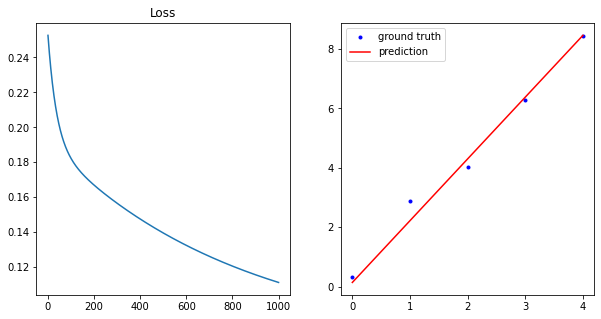

In [84]:
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x, y, '.b')
plt.plot(x, y_hat,'r-')
plt.legend(['ground truth', 'prediction'])
plt.show()

## 데이터 불러오기(DataLoader)

In [87]:
import torch # 파이토치 기본 라이브러리
import torchvision # 이미지 관련된 파이토치 라이브러리
import torchvision.transforms as tr # 이미지 전처리 기능을 제공하는 라이브러리
from torch.utils.data import DataLoader, Dataset # 데이터를 모델에 사용할 수 있도록 정리
import numpy as np
import matplotlib.pyplot as plt

In [88]:
# tr.Compose 내에 원하는 전처리를 차례대로 넣어주면 된다.

transf = tr.Compose([tr.Resize((16,16)), tr.ToTensor()]) # 16x16으로 이미지 크기 변환 후 텐서에 넣음?

In [90]:
# torchvision.datasets에서 제공하는 CIFAR10 데이터를 불러온다.
# root에는 다운로드 받을 경로를 입력한다.
trainset = torchvision.datasets.CIFAR10(root='./data', train= True,
                                        download = True, transform = transf)
testset = torchvision.datasets.CIFAR10(root='./data', train= False,
                                        download = True, transform = transf)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [92]:
# 일반적으로 데이터셋은 이미지와 라벨이 동시에 들어있는 튜플 형태이다.
# trainset[0]은 학습 데이터의 첫 번째 데이터로 이미지 한 장과 라벨 숫자 하나가 저장되어 있다.
# 즉 trainset[0][0]은 이미지이며 trainset[0][1]은 라벨이다.

print(trainset[0][0].size())

# 현재 이미지 사이즈는 3x16x16이다 여기서 3은 채널 수(컬러) 
# 파이토치에서는 (채널수)x(너비)x(높이)로 표현된다. * 텐서플로우는 너비x높이x채널 수

torch.Size([3, 16, 16])


In [94]:
# DataLoader는 데이터를 미니 배치 형태로 만들어 준다.
# 따라서 배치 사이즈 및 셔플 여부 등을 선택할 수 있다.
trainloader = DataLoader(trainset, batch_size = 50, shuffle=True)
testloader = DataLoader(testset, batch_size = 50, shuffle=False)

In [95]:
len(trainloader)
# CIFAR10의 학습 이미지는 50000장이고 배치 사이즈가 50장이므로 1000은 배치의 갯구가 된다.
# 즉 trainloader가 잘 만들어졌음을 의미한다

1000

In [96]:
# iter, next를 이용해 일부 데이터를 확인할 수 있다.
images, labels = iter(trainloader).next()
print(images.size())
# 일반적으로 학습 데이터는 4차원 형태로 모델에서 사용된다.
# (배치 크기)x(채널 수)x(너비)x(높이)

torch.Size([50, 3, 16, 16])


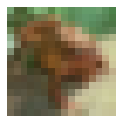

In [98]:
# permute(1,2,0)은 기존 차원의 위치인 0,1,2을 1,2,0으로 바꾸는 함수,
# 즉 0번째 있던 채널값을 마지막으로 보낸다.
oneshot = images[1].permute(1,2,0).numpy()
plt.figure(figsize = (2,2))
plt.imshow(oneshot)
plt.axis('off')
plt.show()

## 이미지 데이터 라벨링
  - 같은 클래스 별로 폴더를 정리한 경우

In [100]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \ -0 /content/cats_and_dogs_filtered.zip
!unzip *.zip
!rm *.zip

--2022-08-29 01:31:33--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   164MB/s    in 0.4s    

2022-08-29 01:31:34 (164 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]

--2022-08-29 01:31:34--  http://%20-0/
Resolving  -0 ( -0)... failed: Name or service not known.
wget: unable to resolve host address ‘ -0’
/content/cats_and_dogs_filtered.zip: Scheme missing.
FINISHED --2022-08-29 01:31:34--
Total wall clock time: 0.6s
Downloaded: 1 files, 65M in 0.4s (164 MB/s)
Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_do

In [103]:
# 데이터가 같은 클래스 별로 미리 폴더를 정리 된 경우, ImageForder의 1줄 선언으로 개인 데이터
# 별도의 라벨링이 필요 x 폴더별로 라벨링
# 다음으로 ImageFolder에 tkddnlvhfej ./class를 입력하면 이미지와 라벨이 정리 되어 데이터를 불러옴

transf = tr.Compose([tr.Resize((128,128)),tr.ToTensor()]) # 128x128 이미지 크기 변환후 텐서
trainset = torchvision.datasets.ImageFolder(root='/content/cats_and_dogs_filtered/validation',
                                            transform=transf) #커스텀 데이터를 불러오기

trainloader = DataLoader(trainset, batch_size=2, shuffle =False) # 데이터를 미니 배치 형태로

### 정리되지 않은 커스텀 데이터 불러오기

In [104]:
# 32x32 컬러 이미지와 라벨이 각각 100장이 있다고 가정하다.
train_images = np.random.randint(256, size=(100,32,32,3))/255 #(이미지수)x(너비)x(높이)
train_labels = np.random.randint(2,size=(100,1))

In [105]:
print(train_images.shape, train_labels.shape)

(100, 32, 32, 3) (100, 1)


In [ ]:
# ###
# from torch.utils.data import Dataset

# class MyDataset(Dataset):
#   def __init__(self):

#   def __getitem__(self, index):
  
#   def __len__(self):

# ### #이 양식을 통으로 가지고 다니자


In [114]:
###
from torch.utils.data import Dataset

class TensorData(Dataset):

  def __init__(self, x_data, y_data):
    self.x_data = torch.FloatTensor(x_data) # 이미지 데이터를 FloatTensor로 변형
    self.x_data = self.x_data.permute(0,3,1,2) # 이미지수x너비x높이x채널수로 순서로 변경
    self.y_data = torch.LongTensor(y_data) # 라벨데이터를 LongTensor로 변경
    self.len = self.y_data.shape[0] # 클래스 내의 들어온 데이터 수

  def __getitem__(self, index):
    return self.x_data[index], self.y_data[index] # 뽑아 낼 데이터를 적어준다.

  def __len__(self):
    return self.len # 클래스 내의 들어온 데이터 개수

# 파이토치에서는 (배치 크기)x(채널수)x(너비)x(높이) 데이터가 사용 되므로 원래 데이터를 변경해야한다. 
# (이미지수)x(너비)x(높이)x(채널수)를 변경해야함

# permute에서 0(이미지 수), 1(너비), 2(높이), 3(채널 수)를
# 0,3,1,2로 바꿔주ㅝ야함 .permute(0,3,1,2)

In [116]:
train_data = TensorData(train_images, train_labels) # 텐서 데이터 불러오기
train_loader = DataLoader(train_data, batch_size = 10, shuffle=True) # 미니 배치 형태로 

### 고급화 데이터 로더

In [117]:
import torch
import torchvision.transforms as tr
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

In [118]:
# 32x32 컬러 이미지와 라벨이 각각 100장이 있다고 가정하다.
train_images = np.random.randint(256, size=(100,32,32,3))/255 #(이미지수)x(너비)x(높이)
train_labels = np.random.randint(2,size=(100,1))

In [119]:
print(train_images.shape, train_labels.shape)

(100, 32, 32, 3) (100, 1)


In [168]:
# 전처리 기술을 직접 만들기
# 이때 기본양식과 같이 사용하기 위해 call 함수를 사용
# def __call__ 내의 원하는 전처리 작업을 프로그램이 할 수 있다.

# 1. 텐서변환
class ToTensor:
  def __call__(self, sample):
    inputs, labels = sample
    inputs = torch.FloatTensor(inputs) # 텐서로 변환
    inputs = inputs.permute(2,0,1) # 형태 변환 (채널x너비x높이)
    return inputs, torch.LongTensor(labels) # 텐서로 변환

In [169]:
# 2. 선형식
class LinearTensor:
  def __init__(self, slope=1, bias=0):
    self.slope = slope
    self.bias = bias

  def __call__(self,sample):
    inputs, labels = sample
    inputs = self.slope*inputs + self.bias # ax+b 계산하기
    return inputs, labels

In [170]:
# 2. CutOut: 이미지 내부에 무작위로 사각형 영역을 선택하여 0으로 만드는 데이터 증식 방법
class CutOut:

  def __init__(self, ratio = 0.5):
    self.ratio = int(1/ratio) # ratio가 0.5dlaus 50%확률로 CutOut 발현

  def __call__(self, sample):
    inputs, labels = sample
    active = int(np.random.randint(0, self.ratio, 1)) # 0 또는 1을 반환 받음

    if active == 0:
      _, w, h = inputs.size() # .size()이미지의 너비와 높이를 받음, input의 크기는
      min_len = min(w,h) # 최소값 구하기
      box_size = int(min_len//4) # CutOut의 길이를 최소값의 1/4로 설정
      idx = int(np.random.randint(0, min_len-box_size, 1)) # idx를 통해 CutOut
      inputs[:,idx:idx+box_size, idx:idx+box_size] = 0 # 해당 영역의 값을 0으로 대체
    
    return inputs, labels

In [171]:
from torch.utils.data import Dataset

class MyDataset(Dataset):

  def __init__(self, x_data, y_data, transform =None):
    self.x_data = x_data
    self.y_data = y_data
    self.transform = transform
    self.len = len(y_data)
    self.tensor = ToTensor()

  def __getitem__(self, index):
    sample = self.x_data[index], self.y_data[index]
    
    if self.transform:
      sample = self.transform(sample) # self.transform이 None이 아니라면 전처리를 하지않음
    else:
      sample = self.tensor(sample)

    return sample

  def __len__(self):
    return self.len


In [172]:
trans = tr.Compose([ToTensor(),CutOut()])
dataset1 = MyDataset(train_images, train_labels, transform = trans)
train_loader1 = DataLoader(dataset1, batch_size=10, shuffle=True)

# ToTensor()와 tr.ToTensor()의 차이
# 앞서 사용한 tr.ToTensor는 import torchvision.transforms as tr을 이용한 파이토치 메소드(컬러패치와 자료형을 텐서로 바꿔주는 역할)
# ToTensor()는 위에서 정의 된 메소드를 사용한 것

In [173]:
images1, labels1 = iter(train_loader1).next()
print(images1.size()) # 배치 및 이미지 크기 확인

torch.Size([10, 3, 32, 32])


In [174]:
import torchvision
def imshow(img):
  plt.figure(figsize=(10,100))
  plt.imshow(img.permute(1,2,0).numpy())
  plt.show()

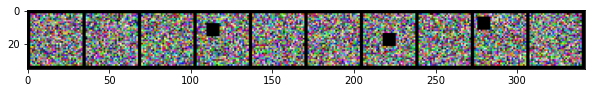

In [175]:
imshow(torchvision.utils.make_grid(images1, nrow=10))

In [176]:
# torchvision.transforms에서 제공하는 전처리 기술을 사용한다.

class MyTransform:

  def __call__(self, sample):
    inputs, labels = sample
    inputs = torch.FloatTensor(inputs)
    inputs = inputs.permute(2,0,1)
    labels = torch.FloatTensor(labels)

    transf = tr.Compose([tr.ToPILImage(), tr.Resize(128), tr.ToTensor()])
    final_output = transf(inputs)

    return final_output, labels

### 전처리 적용

In [177]:
dataset2 = MyDataset(train_images, train_labels, transform=MyTransform())
train_loader2 = DataLoader(dataset2, batch_size=10, shuffle=True)

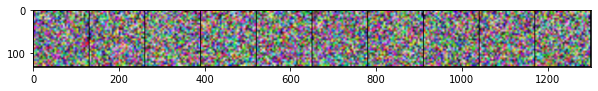

torch.Size([10, 3, 128, 128])


In [178]:
images2, labels2 = iter(train_loader2).next()
imshow(torchvision.utils.make_grid(images2, nrow=10))
print(images2.size())

In [179]:
class MyTransform:

  def __call__(self, sample):
    inputs, labels = sample
    inputs = torch.FloatTensor(inputs)
    inputs = inputs.permute(2,0,1)
    labels = torch.FloatTensor(labels)

    transf = tr.Compose([tr.ToPILImage(), tr.Resize(128), tr.ToTensor(),CutOut()])
    final_output = transf(inputs)

    return final_output, labels

In [183]:
class CutOut:

  def __init__(self, ratio = 0.5):
    self.ratio = int(1/ratio) # ratio가 0.5dlaus 50%확률로 CutOut 발현

  def __call__(self, inputs):
    active = int(np.random.randint(0, self.ratio, 1)) 

    if active == 0:
      _, w, h = inputs.size() # .size()이미지의 너비와 높이를 받음, input의 크기는
      min_len = min(w,h) # 최소값 구하기
      box_size = int(min_len//4) # CutOut의 길이를 최소값의 1/4로 설정
      idx = int(np.random.randint(0, min_len-box_size, 1)) # idx를 통해 CutOut
      inputs[:,idx:idx+box_size, idx:idx+box_size] = 0 # 해당 영역의 값을 0으로 대체
    
    return inputs

전처리 적용

In [181]:
dataset3 =MyDataset(train_images, train_labels, transform=MyTransform())
train_loader3 = DataLoader(dataset3, batch_size = 10, shuffle = True)

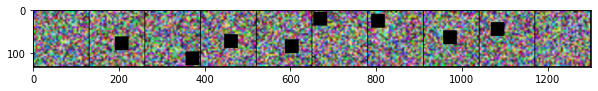

torch.Size([10, 3, 128, 128])


In [188]:
images3, labels3 = iter(train_loader3).next()
imshow(torchvision.utils.make_grid(images3, nrow=10))
print(images3.size())

### CIFAR10 데이터와 커스텀 전처리

In [189]:
transf = tr.Compose([tr.Resize(128), tr.ToTensor(), CutOut()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download = True, transform=transf)

Files already downloaded and verified


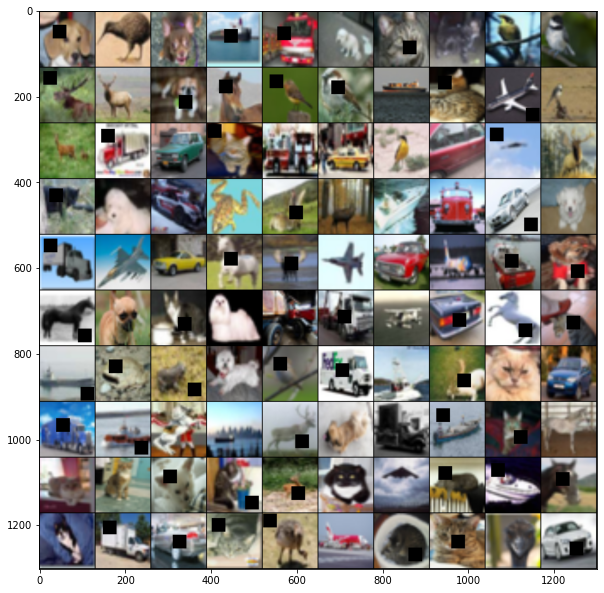

torch.Size([100, 3, 128, 128])


In [193]:
trainloader = DataLoader(trainset, batch_size=100, shuffle=True)
images, labels = iter(trainloader).next()
imshow(torchvision.utils.make_grid(images,nrow=10))
print(images.size()) # 배치 및 이미지 크기 확인